# Cyclistic Case Study

The Cyclistic captsone project is featured as the final project in Google Coursera's Data Analytics Certificate.

Cyclistic is a fictional bike-sharing company based in Chicago. The company plans to increase overall profits by developing a marketing campaign aimed at turning causal riders (those using single day passes or full day passes) into Cyclistic members (those with an annual membership).

**The aim of this analysis is:**

1. Understand how casual and annual members differ in bike sharing usage

2. Understand how digital media can influence casual riders to become annual members.

3. Identify the effect if Digital Media in the development of the Marketing Campaign. 

**Preliminary Cleaning in Excel**

Prior to loading files in R, data was cleaned in Excel. Columns for ride length (ride_length) and day of the week for the ride (day_of_week) were added. 

One error identified included switching start time and end time of rides (end time should come after start time).

Ride length variable was changed from character to integer in excel.



For more information on the Case Study, see [here](http://chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://d3c33hcgiwev3.cloudfront.net/aacF81H_TsWnBfNR_x7FIg_36299b28fa0c4a5aba836111daad12f1_DAC8-Case-Study-1.pdf?Expires=1674604800&Signature=TZipsWkOIaTG0-VCQw8wHHsdglnMlpYrVS7Zhr84XWQCxit2NcUb-Jvq-dH3OaN4SvFClGIf9crkN7FRTwQN0tgcPgH~PWUj1SE~lOwk9-WEv2JGt9Pb4AtmopEX3ICnVD4nRZnwMTw1lzE3fAHb24O4ZJqfTCjUxTNZDm7BAPo_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A)

Data can be accessed [here](http://https://divvy-tripdata.s3.amazonaws.com/index.html)

# Step 1: Loading Libraries

In [ ]:
library(tidyverse) #process data
library(readxl) #process data
library(lubridate) #process date attributes
library(skimr) #process data
library(dplyr) #process and manipulate data better
library(ggplot2) #visualize data
library(knitr)

# Step 2: Loading the Spreadsheets

Loading the spreadsheets for 2022 Cyclistic data into R.

In [ ]:
df1
\<-read.csv("C:/Users/graci/Desktop/Cyclistic
Data/CSV/202201_divvy_tripdata.csv") df2
\<-read.csv("C:/Users/graci/Desktop/Cyclistic
Data/CSV/202202_divvy_tripdata.csv") df3
\<-read.csv("C:/Users/graci/Desktop/Cyclistic
Data/CSV/202203_divvy_tripdata.csv") df4
\<-read.csv("C:/Users/graci/Desktop/Cyclistic
Data/CSV/202204_divvy_tripdata.csv") df5
\<-read.csv("C:/Users/graci/Desktop/Cyclistic
Data/CSV/202205_divvy_tripdata.csv") df6
\<-read.csv("C:/Users/graci/Desktop/Cyclistic
Data/CSV/202206_divvy_tripdata.csv") df7
\<-read.csv("C:/Users/graci/Desktop/Cyclistic
Data/CSV/202207_divvy_tripdata.csv") df8
\<-read.csv("C:/Users/graci/Desktop/Cyclistic
Data/CSV/202208_divvy_tripdata.csv") df9
\<-read.csv("C:/Users/graci/Desktop/Cyclistic
Data/CSV/202209_divvy_tripdata.csv") df10
\<-read.csv("C:/Users/graci/Desktop/Cyclistic
Data/CSV/202210_divvy_tripdata.csv") df11
\<-read.csv("C:/Users/graci/Desktop/Cyclistic
Data/CSV/202211_divvy_tripdata.csv") df12
\<-read.csv("C:/Users/graci/Desktop/Cyclistic
Data/CSV/202212_divvy_tripdata.csv")

# Step 3: Do Data Checks

Use str(dataset) for data checks for each data frame


In [ ]:
str(df1)
str(df2)
str(df3)
str(df4)
str(df5)
str(df6)
str(df7)
str(df8)
str(df9)
str(df10)
str(df11)
str(df12)

# Step 4: Combine data frames

Combine each data frame by creating a vector and using rbind. Once joined, check te new table using head, nrow, is. null and calculate the average for all the data.

In [ ]:
all_trips<- rbind(df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12)
head(all_trips) #data check
nrow(all_trips) #data check
is.null(all_trips) #data check for empty cells
mean(ride_length) #find the average ride length all around

#Delete the old spreadsheets and bring up a summary of the excel spreadsheet
rm(df1)
rm(df2)
rm(df3)
rm(df4)
rm(df5)
rm(df6)
rm(df7)
rm(df8)
rm(df9)
rm(df10)
rm(df11)
rm(df12)
summary(all_trips)

# Step 5: Transform the Data

Data checks for the all_trips data frame to confirm  column names and input options:

In [ ]:
sapply(all_trips, class) #output all_trips data frame as a vector
colnames(all_trips) #show column names for check
dim(all_trips) 
str(all_trips) 
print("Check member_casual")
unique(all_trips$member_casual) #checking that values that are either "member" or "casual" 
nrow(all_trips %>% filter (ride_length<= 0)) #checking  that rows that have a ride length less than or equal to zero
min (all_trips$started_at) # Checking that all the data is from 2022
max(all_trips$started_at)
find_mode(all_trips$day_of_week) all_trips<- all_trips %>%  mutate(weekday =wday(started_at, label = TRUE)) #find the mode/ most common day for trips

Spplitting up the date field into month, day, year and hour

In [ ]:
all_trips$date<- as.Date(all_trips$started_at)
all_trips$month<- format(as.Date(all_trips$date), "%m")
all_trips$day<- format(as.Date(all_trips$date), "%d")
all_trips$year<- format(as.Date(all_trips$date), "%Y")
all_trips$hour<- format(as.Date(all_trips$date), "%H")

# Step 6: Descriptive Analysis

Check rows that have a ride length less than or equal to zero.

In [ ]:
summary(all_trips) 
str(all_trips) 
all_trips %>% 
    group_by(member_casual) %>%
    summarise (sample = n(), mean(ride_length), median(ride_length), min(ride_length), max(ride_length)) %>% 
    ungroup()

In [ ]:
print("rides by user type and by month") 
all_trips %>%
    group_by(member_casual, month) %>% 
    summarise(number_of_rides = n ()) %>%
    arrange(member_casual, month) 

print("rides by user type and weekday") 
all_trips %>% 
    group_by(member_casual, weekday) %>%
    summarise(number_of_rides = n()) %>% 
    arrange(member_casual, weekday)

print("average rides by user type and weekday") 
all_trips %>%
    group_by(member_casual, weekday) %>% 
    summarise(average_duration =
    mean(ride_length)) %>% 
    arrange(member_casual, weekday) 

In [ ]:
mean(all_trips_v2$ride_length) #straight average (total ride length/ rides) median(all_trips_v2$ride_length)
#midpoint number in the ascending array of ride lengths
max(all_trips_v2$ride_length) #longest ride min(all_trips_v2$ride_length)
#shortest ride
summary(all_trips_v2$ride_length) #Compare members and casual users aggregate(all_trips_v2$ride_length

# Step 6: Visualization

Creating bar graphs to show the difference between causal and member usership.

In [ ]:
# Compare members and casual users
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = mean)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = median)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = max)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = min)

# See the average ride time by each day for members vs casual users
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

# Notice that the days of the week are out of order. Let's fix that.
all_trips_v2$day_of_week <- ordered(all_trips_v2$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

# Now, let's run the average ride time by each day for members vs casual users
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

# analyze ridership data by type and weekday
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>%  #creates weekday field using wday()
  group_by(member_casual, weekday) %>%  #groups by usertype and weekday
  summarise(number_of_rides = n()							#calculates the number of rides and average duration 
            ,average_duration = mean(ride_length)) %>% 		# calculates the average duration
  arrange(member_casual, weekday)								# sorts

#Visualise number of rides by rider type
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
    geom_col(position = "dodge")+labs(title="Monthly Rides by User",subtitle="Cyclistic 2022 Data",x="Month",y="Rides")

# Visualize for average duration
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge")+labs(title="Average Duration by User",subtitle="Cyclistic 2022 Data",x="Month",y="Rides")


In [ ]:
![Rplot Weekly Rides by User.png](attachment:e0f67f4f-af0b-47be-af8e-4ec6a306287c.png)

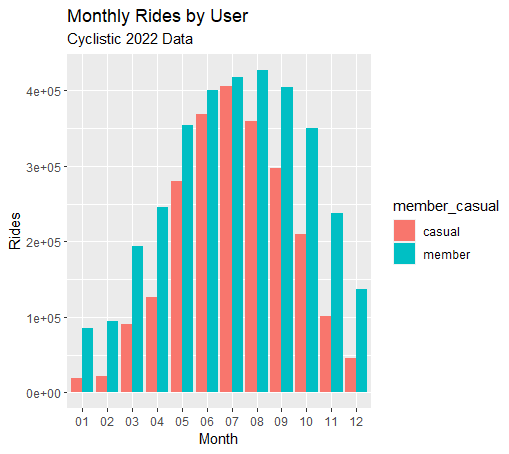

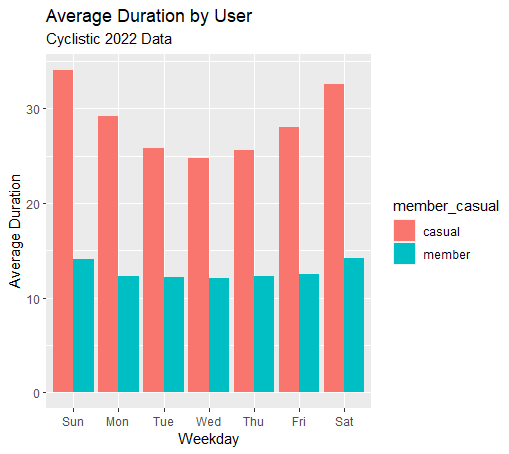